In [105]:
import numpy as np
import pydicom
from skimage import exposure
from skimage import img_as_float
from matplotlib import pyplot as plt

In [ ]:
img = pydicom.dcmread('/mnt/e/ImagensDataset/00012_20990909_R_MLO_1.dcm')
imgArray = np.array(img.pixel_array)
nroBits = np.max(imgArray)

## Normalização da Imagem: 
##### Equação:
$xnorm=\frac{x-xmin}{xmax-xmin}$

In [ ]:
# Normalizando imagem
imgNormalized = imgArray/4095
print(imgNormalized)
print(np.max(imgNormalized))
print(np.min(imgNormalized))

# Calculando o Histograma da Imagem 
* Obs: A imagem e 16bits, portanto a faixa de valores é muito maior que o normal de outras imagens, portante eh necessario calcular atraves de outras bibliotecas, opencv nao funciona.
#### # Histograma 
`Histograma eh um grafico de barras que demonstra uma distribuicao de frequencias de uma determinado tipo de variavel`
* No processamento de imagens:
- Representa um grafico de frequencias de intensidade de pixels na imagem. Representa o numero de pixels para cada intensidade de valor considerado.

In [61]:
imgEqHist = exposure.equalize_hist(imgNormalized, nbins=np.max(imgArray))
imgEqAdaptHist = exposure.equalize_adapthist(imgNormalized, nbins=np.max(imgArray), clip_limit=0.6)

#hist, bin = np.histogram(imgEqHist.ravel(), bins=bits, range=np.max(imgArray))

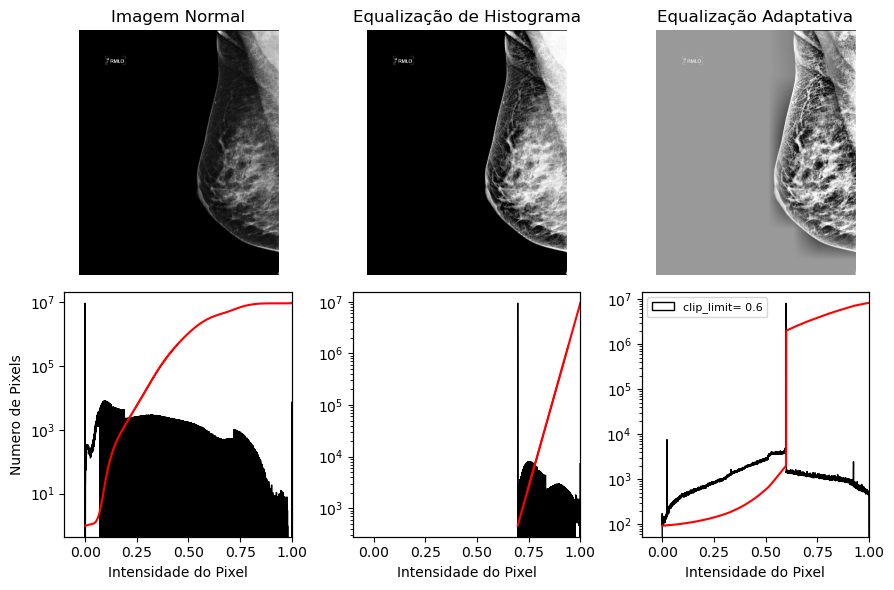

In [104]:
def plot_Img_and_Hist(img, axes, nBins=4095):
    image = img_as_float(img)

    axeImg, axeHist = axes
    axeCdf = axeHist.twinx()

    # Display na imagem
    axeImg.imshow(image, cmap=plt.cm.gray)
    axeImg.set_axis_off()

    # Display no Histograma da imagem
    axeHist.hist(image.ravel(), bins=nBins, histtype='step', color='black')
    axeHist.semilogy()
    axeHist.set_xlabel('Intensidade do Pixel')
    axeHist.set_xlim(-0.1, 1)

    # Cumulative Distribution da imagem
    imgCdf, bins = exposure.cumulative_distribution(image, nBins)
    axeCdf.plot(bins, imgCdf, 'r')
    axeCdf.set_yticks([])
    return axeImg, axeHist, axeCdf


fig = plt.figure(figsize=(9, 6))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = fig.add_subplot(2, 3, 1)
for i in range(1, 3):
    axes[0, i] = fig.add_subplot(2, 3, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 3):
    axes[1, i] = fig.add_subplot(2, 3, 4+i)

# Imagem Normal, sem nenhuma Equalizacao
axeImg, axeHist, axeCdf = plot_Img_and_Hist(imgNormalized, axes[:, 0])
axeImg.set_title('Imagem Normal')
axeHist.set_ylabel('Numero de Pixels')

# Imagem com Equalizacao de Histograma
axeImg, axeHist, axeCdf = plot_Img_and_Hist(imgEqHist, axes[:, 1])
axeImg.set_title('Equalização de Histograma')

# Imagem com Equalizacao Adaptativa de Histograma
axeImg, axeHist, axeCdf = plot_Img_and_Hist(imgEqAdaptHist, axes[:, 2])
axeImg.set_title('Equalização Adaptativa')

#yMin, yMax = axeHist.get_ylim()
#axeHist.text(0, yMax-(10**7), 'clip_limit= 0.6')
axeHist.legend(['clip_limit= 0.6'], fontsize=8,loc=2)

fig.tight_layout()
plt.show()
